In [1]:
# Code from last time (changed order of parameters))

In [5]:
import numpy
def julia(c, max_iter, xmin=-2.0, xmax=2.0, ymin=-2.0,ymax=2.0, width=500, height=500):
    """Draw Julia set J(f) for f(z)=z^2+c in window where x ranges 
    in (xmin,xmax), y ranges in (ymin,ymax), grid of size width x height.
    Test max_iter number iterates of f."""

    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height

    escape = numpy.zeros((height,width))
    # array will eventually represent escaping

    for x in range(width):
        for y in range(height): 
            z = complex(xmin + x*xinc, ymin + y*yinc)
            # Want: set escape[y,x]=1 if z escapes i.e. |z|, |f(z)|, |f^{\circ 2}(z)| ->infty
            # Special thing about f(z) = z^2+c, when |c|<2:
            # if |z|>2, |f^{\circ n}(z)|-> infty as n ->infty
            # So: if for any z, |f^{\circ k}(z)|>2, z escapes 
            
            # compute iterates of f applied to z 
            n=0 # which iterate we're currently on
            while n < max_iter: 
                z = z^2 + c # take next iterate i.e. replace z by f(z)
                n+=1
                if abs(z)>2:
                    # then by above comments, know that original z escapes 
                    escape[y,x]=1
                    break # breaks out of containing loop 
    
    return matrix_plot(escape, origin='lower')

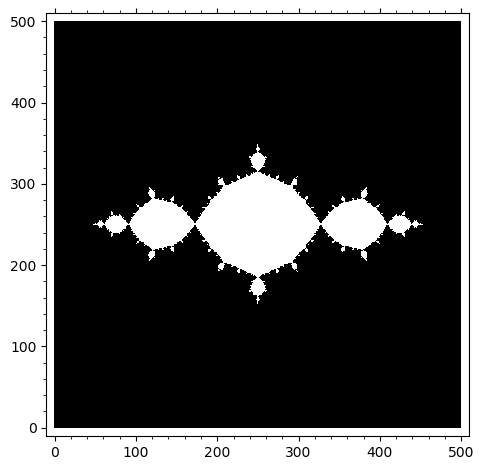

In [4]:
# f(z) = z^2 -1 
julia(complex(-1,0), 20)
#"basillica" julia set

In [ ]:
# ZOOMING 

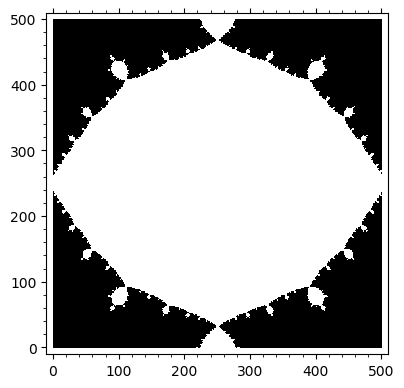

In [7]:
# zoom in centered at origin
# f(z) = z^2 -1 
julia(complex(-1,0), 20, -0.6,0.6, -0.6,0.6)
#"basillica" julia set

In [9]:
# want: zoom in centered at point give in grid coordinates 
# need to convert from grid coordinates (in pixels) to complex coords
def grid_to_cpx(x,y, xmin=-2.0, xmax=2.0, ymin=-2.0,ymax=2.0, width=500, height=500):
    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height
    z = complex(xmin + x*xinc, ymin + y*yinc)
    return z
    

In [10]:
grid_to_cpx(330,250)

(0.6400000000000001+0j)

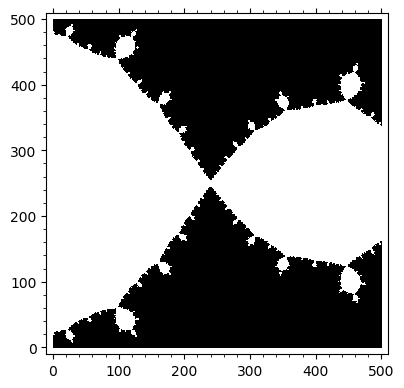

In [12]:
# zoom in on a particular point given in grid coords
z = grid_to_cpx(330,250)
c = complex(-1,0)
zr = real(z)
zi = imag(z)
e = 0.5
julia(c, 20, zr-e,zr+e, zi-e,zi+e)

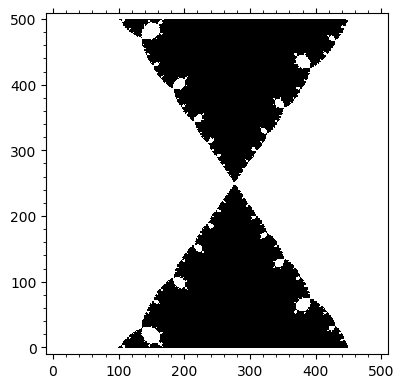

In [16]:
# to get good pictures, need to increase max_iter as we zoom in 
# zoom in on a particular point given in grid coords
z = grid_to_cpx(327,250)
c = complex(-1,0)
zr = real(z)
zi = imag(z)
e = 0.02 # side length of window will be 2e
julia(c, 40, zr-e,zr+e, zi-e,zi+e)

In [ ]:
# ORBITS

In [30]:
# Want: draw "orbit": z, f(z), f(f(z)), ...
# for various z, where f(z) = z^2 + c 
# first will do for f(z)=z^2 
def draw_orbit(z, c, num_iter, col='blue'):
    """Return a plot of points z,f(z),f(f(z)),.. up to num_iter iterations,
    where f(z)=z^2+c. Can set color"""
    orbit = [z] # list that will store the orbit 
    for n in range(num_iter):
        new = orbit[-1]^2 + c 
        orbit.append(new)
    return list_plot(orbit, size=20, color=col)\
    + line([(real(z),imag(z)) for z in orbit], color=col)
    

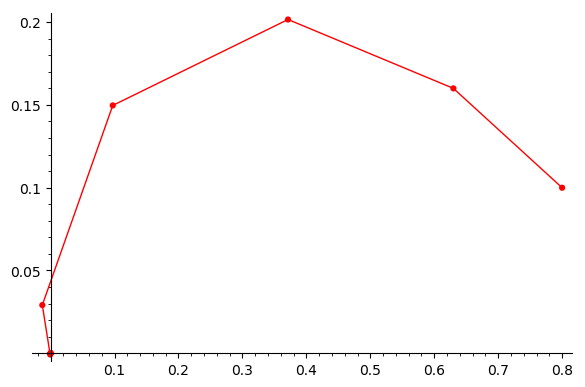

In [33]:
# orbit for f(z)=z^2
draw_orbit(complex(0.8,0.1),complex(0,0),10, col='red')

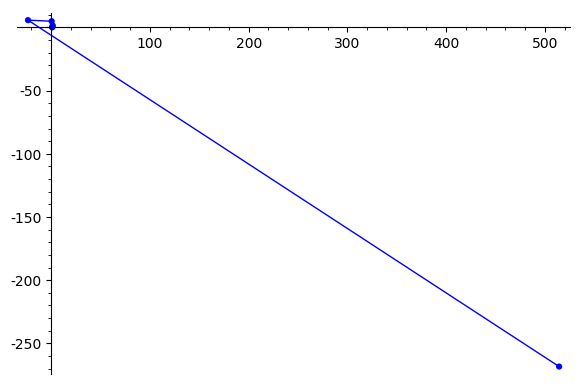

In [29]:
# orbit for f(z)=z^2
draw_orbit(complex(1.1,0.1),complex(0,0),6)

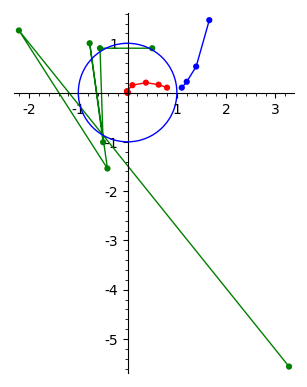

In [40]:
#f(z)=z^2
draw_orbit(complex(0.8,0.1),complex(0,0),10, col='red')+\
draw_orbit(complex(1.1,0.1),complex(0,0),3)+\
draw_orbit(complex(0.5,0.9),complex(0,0),6, col='green')+\
circle((0,0),1)

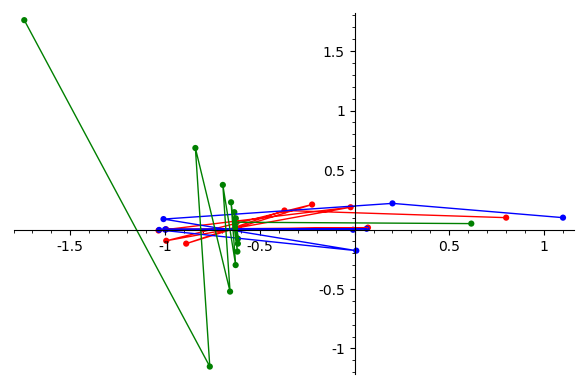

In [55]:
#f(z)=z^2-1
c=complex(-1,0)
draw_orbit(complex(0.8,0.1),c,8, col='red')+\
draw_orbit(complex(1.1,0.1),c,8)+\
draw_orbit(complex(0.616,0.05),c,13, col='green')


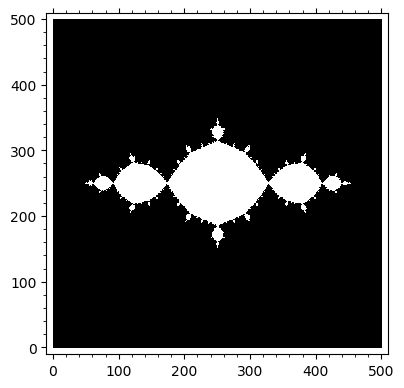

In [52]:
# f(z) = z^2 -1 
julia(complex(-1,0), 20)
#"basillica" julia set

In [ ]:
# COLORED JULIA SETS

In [56]:
# Goal: color plane according to how fast points escape under iteration of f

In [66]:
def julia_color(c, max_iter, xmin=-2.0, xmax=2.0, ymin=-2.0,ymax=2.0, width=500, height=500):
    """Draw Julia set J(f) for f(z)=z^2+c in window where x ranges 
    in (xmin,xmax), y ranges in (ymin,ymax), grid of size width x height.
    Test max_iter number iterates of f.
    Color points according to number of iterations to get outside disk of radius 2."""

    xinc = (xmax-xmin)/width
    yinc = (ymax-ymin)/height

    escape = numpy.zeros((height,width))
    # array will eventually represent escaping

    for x in range(width):
        for y in range(height): 
            z = complex(xmin + x*xinc, ymin + y*yinc)
            # Want: set escape[y,x]=1 if z escapes i.e. |z|, |f(z)|, |f^{\circ 2}(z)| ->infty
            # Special thing about f(z) = z^2+c, when |c|<2:
            # if |z|>2, |f^{\circ n}(z)|-> infty as n ->infty
            # So: if for any z, |f^{\circ k}(z)|>2, z escapes 
            
            # compute iterates of f applied to z 
            n=0 # which iterate we're currently on
            while n < max_iter: 
                z = z^2 + c # take next iterate i.e. replace z by f(z)
                n+=1
                if abs(z)>2:
                    # then by above comments, know that original z escapes 
                    break # breaks out of containing loop 
            # at this point n is between 1 and max_iter
            # n = max_iter when if statement never passed i.e. z does not escape 
            # n is small if z escapes quickly  
            escape[y,x]=n/max_iter
    
    return matrix_plot(escape, origin='lower', cmap='hot')

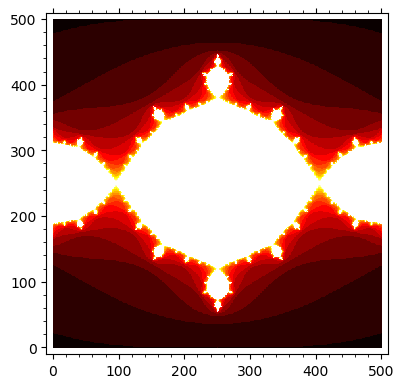

In [68]:
# f(z) = z^2 -1 
julia_color(complex(-1,0), 20, -1,1,-1,1)
#"basillica" julia set

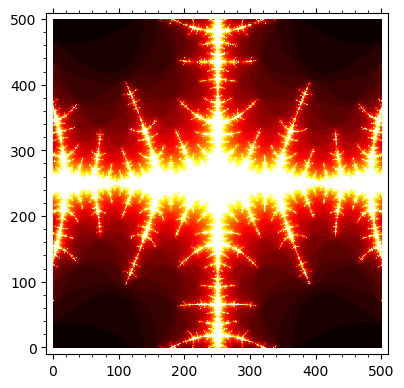

In [71]:
# Feigenbaum julia set
julia_color(complex(-1.401,0), 50, -0.2,0.2,-0.2,0.2)

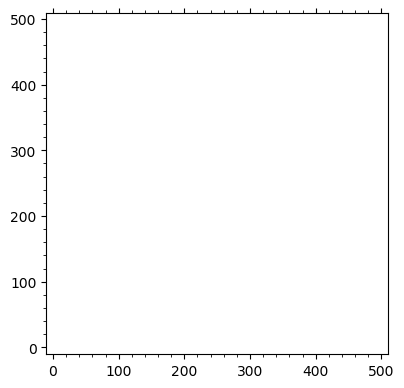

In [72]:
# f(z) = z^2 +(0.5+0.7i)
julia(complex(0.5,0.7), 30, -2,2,-2,2)
# Actually should be all black: julia[y,x] = 1 for all (x,y) tested
# but sage doesn't like all black, so makes all white. 
# Q: Is escaping set actually everything? 

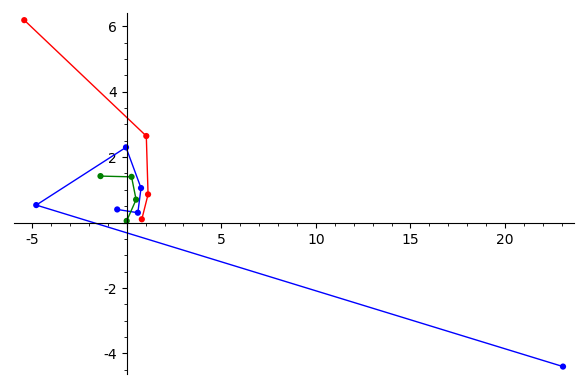

In [78]:
# f as above
c=complex(0.5,0.7)
draw_orbit(complex(0.8,0.1),c,3, col='red')+\
draw_orbit(complex(-0.5,0.4),c,5)+\
draw_orbit(complex(0,0.05),c,3, col='green')
# will see that a "random" orbit escapes 

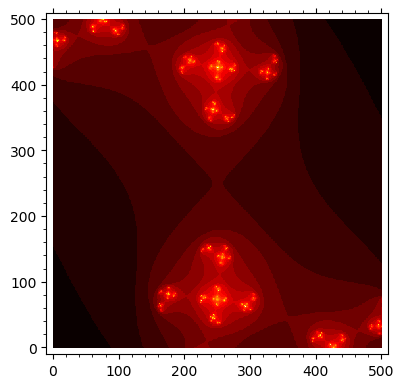

In [81]:
# f(z) = z^2 +(0.5+0.7i)
julia_color(complex(0.5,0.7), 40, -1,1,-1,1)
# The Julia set consists of the scattered stars at the centers of the hot regions 
# This set is "small," but non-empty, and in fact has infinitely many points